In [1]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')
metadata_byday = metadata_byday.groupby('STATE').sum()
metadata_byday

,FIPS,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,2020-03-23_recovered,2020-03-23_active,2020-03-24_confirmed,...,2020-05-11_recovered,2020-05-11_active,2020-05-12_confirmed,2020-05-12_deaths,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,71489,157,0,0,0,196,0,0,0,242,...,0.0,9761.0,10464.0,435.0,0.0,10029.0,10700.0,450.0,0.0,10250.0
ALASKA,62340,18,0,0,0,30,0,0,0,34,...,0.0,369.0,379.0,10.0,0.0,369.0,379.0,10.0,0.0,369.0
ARIZONA,60208,152,2,0,0,235,2,0,0,326,...,0.0,10842.0,11736.0,561.0,0.0,11175.0,12216.0,594.0,0.0,11622.0
ARKANSAS,380625,44,0,0,0,189,0,0,0,206,...,0.0,3818.0,4027.0,95.0,0.0,3932.0,4096.0,97.0,0.0,3999.0
CALIFORNIA,351364,1646,30,0,0,2108,39,0,0,2538,...,0.0,66550.0,70978.0,2879.0,0.0,68099.0,72798.0,2957.0,0.0,69841.0
COLORADO,515983,590,6,0,0,703,7,0,0,718,...,0.0,18743.0,20056.0,1006.0,0.0,19050.0,20390.0,1058.0,0.0,19332.0
CONNECTICUT,72064,327,8,0,0,415,10,0,0,618,...,0.0,30487.0,34070.0,3038.0,0.0,31032.0,34605.0,3120.0,0.0,31485.0
DELAWARE,30009,56,0,0,0,68,0,0,0,104,...,0.0,6300.0,6705.0,236.0,0.0,6469.0,6916.0,246.0,0.0,6670.0
DISTRICT OF COLUMBIA,11001,102,2,0,0,120,2,0,0,141,...,0.0,6061.0,6485.0,336.0,0.0,6149.0,6584.0,350.0,0.0,6234.0


In [15]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders = state_orders.groupby('STATE').mean()
state_orders

,FIPS,ban_days,days_since_order,days_since_reopen,ann_to_eff
STATE,,,,,
ALABAMA,1067.000000,26.0,40.0,14.0,1.0
ALASKA,2149.655172,24.0,47.0,20.0,1.0
ARIZONA,4013.866667,46.0,44.0,-2.0,1.0
ARKANSAS,5075.000000,0.0,0.0,8.0,0.0
CALIFORNIA,6058.000000,134.0,56.0,6.0,0.0
COLORADO,8062.234375,31.0,49.0,17.0,0.0
CONNECTICUT,9008.000000,58.0,52.0,-6.0,3.0
DELAWARE,10003.000000,52.0,51.0,-18.0,2.0
DISTRICT OF COLUMBIA,11001.000000,68.0,43.0,-78.0,2.0


In [42]:
X = state_orders[['ban_days','days_since_order', 'days_since_reopen', 'ann_to_eff']]

In [25]:
X = state_orders[['ban_days','days_since_order', 'days_since_reopen']]

In [65]:
y = (metadata_byday.iloc[:,-1] < metadata_byday.iloc[:,-5]).astype(int)

In [66]:
y.value_counts()

0    51
dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

1.0

Text(0.5, 0, 'Average contribution of information gain')

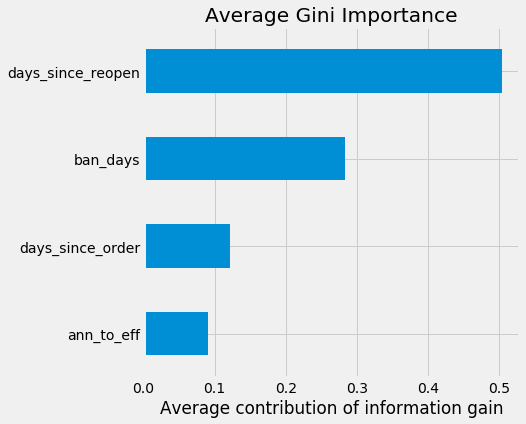

In [53]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

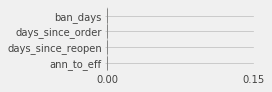

In [54]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [55]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[13]])

In [56]:
precision_score(y_test, rfc.predict(X_test))

1.0

In [57]:
recall_score(y_test, rfc.predict(X_test))

1.0